The sigmoid function is commonly used in binary classification tasks to map the output of a neuron to a range between 0 and 1. This makes it useful for predicting the probability of an event occurring. During backpropagation, the derivative of the sigmoid function is used to calculate gradients and update the model's weights.

The ReLU (Rectified Linear Unit) function is used to introduce non-linearity to the model. It returns the input value if it is positive, and 0 otherwise. ReLU is known for its performance in deep neural networks. During backpropagation, the derivative of ReLU is 1 for positive inputs and 0 for negative inputs, which is used to calculate gradients and update the model's weights.

The Tanh (Hyperbolic Tangent) function outputs values between -1 and 1 and is similar to the sigmoid function. However, it can sometimes result in faster convergence during training. The derivative of Tanh is used in backpropagation to calculate gradients and update the model's weights.

Binary Cross-Entropy Loss is a commonly used loss function in binary classification models. It measures the difference between predicted probabilities and true labels and guides the optimization algorithm to update model weights to minimize the loss. This loss function is particularly useful when the output of the model is a probability between 0 and 1.

In [1]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

# Assuming binary classification and sigmoid activation for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Define loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [2]:
activation_functions = {
    'sigmoid': (sigmoid, sigmoid_derivative),
    'relu': (relu, relu_derivative),
    'tanh': (tanh, tanh_derivative)
}

In [3]:
def initialize_parameters(input_size, neurons, hidden_layers, output_size):
    np.random.seed(42)  # For reproducibility
    weights = []
    biases = []

    # Input to first hidden layer
    weights.append(np.random.randn(input_size, neurons) * 0.01)
    biases.append(np.zeros((1, neurons)))

    # Hidden layers
    for i in range(hidden_layers - 1):
        weights.append(np.random.randn(neurons, neurons) * 0.01)
        biases.append(np.zeros((1, neurons)))

    # Last hidden layer to output
    weights.append(np.random.randn(neurons, output_size) * 0.01)
    biases.append(np.zeros((1, output_size)))

    return weights, biases

The above text explains about the activation functions dictionary and the parameters initialization function for the neural network. The activation function is used to introduce non-linearity into the output of a neuron in the network, and the derivative of the activation function is used during backpropagation to update the network's weights with respect to the loss gradient. The parameters initialization function initializes the weights and biases of a neural network with a specified architecture. It uses a random seed to ensure that the random numbers are reproducible and initializes lists for weights and biases to store the parameters for each layer. The weights and biases are initialized with small random values and zero vectors, respectively, and will be updated iteratively through training to minimize the loss function.

In [4]:
def forward_backward_pass(X, y, weights, biases, learning_rate, activation_funcs, valid=False):
    activations = [X]
    derivatives = []
    # Forward pass
    for i, (w, b) in enumerate(zip(weights, biases[:-1])):
        
        activation, derivative = activation_functions[activation_funcs]
        z = np.dot(activations[-1], w) + b
        activations.append(activation(z))
        derivatives.append(derivative(z))

    # Output layer
    output = sigmoid(np.dot(activations[-1], weights[-1]) + biases[-1])
    activations.append(output)
    
    # Compute loss
    loss = binary_cross_entropy_loss(y, output)
    if valid:
        return loss, output
    # Backward pass
    deltas = [output - y]  # Error at output layer
    for i in range(len(weights) - 2, -1, -1):
        deltas.append(deltas[-1].dot(weights[i + 1].T) * derivatives[i])
    deltas.reverse()

    # Update weights and biases
    for i in range(len(weights)):
        weights[i] -= learning_rate * np.dot(activations[i].T, deltas[i])
        biases[i] -= learning_rate * np.mean(deltas[i], axis=0, keepdims=True)

    return loss, output


This function takes in various inputs such as the input data, true labels, current weights and biases, learning rate, activation functions, and a flag to determine if it is for validation. The forward pass involves iterating over each layer to compute the activations, apply the activation function, and store the derivatives. For the output layer, the sigmoid function is used for binary classification tasks. The binary cross-entropy loss is computed and if the function is being called for validation, it returns the loss and output without performing a backward pass. If not, it proceeds to the backward pass to update the weights and biases using gradient descent. Finally, the function returns the loss and output predictions, which can be used to monitor the network's performance during training. With this function, you can easily train neural networks and ensure they're learning correctly.

In [5]:
# Load data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

# Extract features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

X_validate = validate_data.iloc[:, :-1].values
y_validate = validate_data.iloc[:, -1].values.reshape(-1, 1)


In [6]:
# Normalize features (Preprocessing step)
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_validate = (X_validate - np.mean(X_validate, axis=0)) / np.std(X_validate, axis=0)

# One-hot encode labels to represent categorical variables
y_train_one_hot = np.eye(2)[y_train.flatten()]
y_validate_one_hot = np.eye(2)[y_validate.flatten()]


The train_mlp_model function is a comprehensive tool for training multilayer perceptron models, which are a type of feedforward artificial neural network. This function takes several input parameters, including X_train, y_train, X_val, y_val, the learning rate, the number of neurons, the number of layers, the activation function, and the number of epochs. It initializes weights and biases, tracks losses during training and validation, and performs forward and backward propagation for each epoch. The final validation accuracy is calculated by comparing the rounded predictions from the last forward pass on the validation set to the actual validation labels. Upon completion, the function provides outputs of accuracy, training_losses, and validation_losses. This function is an all-encompassing solution for training MLP models, and it provides a detailed summary of the model's performance during the training process.


In [7]:

# Function for training the MLP model
def train_mlp_model(X_train, y_train, X_val, y_val, lr, neurons, layers, activation_func, epochs):
    # Initialize weights and biases
    

    weights, bias = initialize_parameters(input_size=2, neurons=neurons, hidden_layers=layers, output_size=2)
    # [Similar to your existing initialization code]

    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        # Forward and backward propagation on the training data
        train_loss,_ = forward_backward_pass(X=X_train, y=y_train,weights=weights,biases=bias,learning_rate=lr,activation_funcs=activation_func, valid=False)
        # Store the training loss for this epoch
        training_losses.append(train_loss)

        # Perform a forward pass on the validation data
        val_loss, validation_output = forward_backward_pass(X_val, y_val, weights=weights, biases=bias,learning_rate=lr,activation_funcs=activation_func, valid=True)
        # Calculate and store the validation loss
        validation_losses.append(val_loss)

    # Calculate the final validation accuracy
    accuracy = np.mean(np.round(validation_output) == y_val)

    return accuracy, training_losses, validation_losses



The code snippet provides a systematic approach to tuning hyperparameters for an MLP model. It defines lists of possible values for different hyperparameters and tests all possible combinations. The results are sorted by validation accuracy, and the best-performing model is identified. The code outputs the details of each model configuration and its validation accuracy, providing valuable insight into which hyperparameters work best for the given problem. Finally, the best-performing model's hyperparameters and accuracy are printed, giving a clear understanding of the most effective neural network architecture and learning settings for the specific task.


In [8]:
# Hyperparameters
learning_rates = [0.1, 0.01, 0.001]
neurons_per_layer = [5, 10, 20]
hidden_layers = [2, 3, 5]
activation_combinations = ['relu', 'tanh', 'sigmoid']

#activation_funcs = ['sigmoid', 'relu', 'tanh']
epochs = 1000

# Store results and plot_results (to be used for paralell cordinate plot)
results = []
plot_results = []
# Training loop for different hyperparameter combinations
for lr, neurons, layers, activation_func in product(learning_rates, neurons_per_layer, hidden_layers, activation_combinations):
    
    accuracy, train_losses, val_losses = train_mlp_model(
            X_train, y_train_one_hot, X_validate, y_validate_one_hot, lr, neurons, layers, activation_func, epochs
        )

    # Store the result
    results.append({
        "lr": lr,
        "neurons": neurons,
        "layers": layers,
        "activation_func": activation_func,
        "accuracy": accuracy,
        "training_losses": train_losses,
        "validation_losses": val_losses
    })
    # Store plot_results
    plot_results.append({
        "lr": lr,
        "neurons": neurons,
        "layers": layers,
        "activation_func": activation_func,
        "accuracy": accuracy
    })


# Sort and display results
results.sort(key=lambda x: x['accuracy'], reverse=True)
for result in results:
    print(f"LR: {result['lr']}, Neurons: {result['neurons']}, Layers: {result['layers']}, "
          f"Activation: {result['activation_func']}, Accuracy: {result['accuracy']}")

best_model = results[0]
print("\nBest Model Hyperparameters and Performance:")
print("Activation Function:", best_model['activation_func'])
print("Learning Rate:", best_model['lr'])
print("Number of Neurons per Layer:", best_model['neurons'])
print("Number of Layers:", best_model['layers'])
print("Accuracy:", best_model['accuracy'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17820\851499314.py:27: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17820\851499314.py:27: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17820\851499314.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17820\856955778.py:23: RuntimeWarning: overflow encountered in multiply
  deltas.append(deltas[-1].dot(weights[i + 1].T) * derivatives[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17820\851499314.py:11: RuntimeWarning: overflow encountered in multiply
  return x * (1 - x)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encounte

LR: 0.001, Neurons: 10, Layers: 2, Activation: relu, Accuracy: 0.975609756097561
LR: 0.001, Neurons: 20, Layers: 2, Activation: relu, Accuracy: 0.975609756097561
LR: 0.001, Neurons: 20, Layers: 3, Activation: relu, Accuracy: 0.7804878048780488
LR: 0.01, Neurons: 10, Layers: 2, Activation: relu, Accuracy: 0.7439024390243902
LR: 0.01, Neurons: 20, Layers: 2, Activation: relu, Accuracy: 0.7439024390243902
LR: 0.01, Neurons: 5, Layers: 3, Activation: relu, Accuracy: 0.6951219512195121
LR: 0.001, Neurons: 5, Layers: 2, Activation: relu, Accuracy: 0.6951219512195121
LR: 0.01, Neurons: 10, Layers: 3, Activation: relu, Accuracy: 0.6463414634146342
LR: 0.01, Neurons: 10, Layers: 2, Activation: tanh, Accuracy: 0.5975609756097561
LR: 0.01, Neurons: 5, Layers: 2, Activation: tanh, Accuracy: 0.573170731707317
LR: 0.001, Neurons: 10, Layers: 3, Activation: sigmoid, Accuracy: 0.5426829268292683
LR: 0.01, Neurons: 20, Layers: 2, Activation: tanh, Accuracy: 0.524390243902439
LR: 0.001, Neurons: 5, Laye

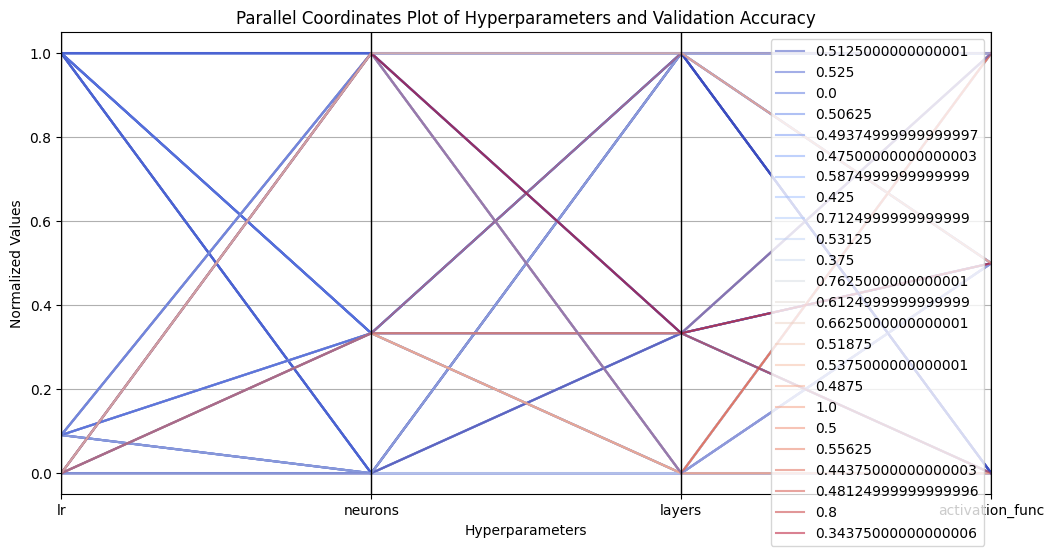

In [9]:

from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder


# Converting the 'results' list to a DataFrame
df = pd.DataFrame(plot_results)

# Encoding the 'activation_func' column, as parallel coordinates plots require numerical data
label_encoder = LabelEncoder()
df['activation_func'] = label_encoder.fit_transform(df['activation_func'])

# Normalizing the DataFrame for better visualization in the plot
df_normalized = (df - df.min()) / (df.max() - df.min())

# Creating the Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df_normalized, class_column='accuracy', colormap='coolwarm', alpha=0.5)
plt.title('Parallel Coordinates Plot of Hyperparameters and Validation Accuracy')
plt.xlabel('Hyperparameters')
plt.ylabel('Normalized Values')
plt.grid(True)
plt.show()


The provided code creates a parallel coordinates plot to visualize the performance of different hyperparameter combinations for an MLP model. The plot_results list is converted into a pandas DataFrame, normalized, and plotted using parallel_coordinates. This visualization is useful for identifying which hyperparameters tend to lead to higher or lower accuracies and can guide further rounds of hyperparameter tuning and model selection.

The provided parallel coordinates plot is a useful way to visualize and interpret the effects of hyperparameters on model performance. Each vertical line represents a hyperparameter or the accuracy, and each line represents one combination of hyperparameters and accuracy. The color of the line represents the accuracy, with a color gradient applied. Observing the lines can reveal trends, interactions between hyperparameters, and optimal combinations. However, overlapping lines and the need for further quantitative analysis or interactivity may pose challenges. Overall, the parallel coordinates plot is a powerful visualization tool for identifying which hyperparameter combinations tend to yield better model performance.
